#  Objective
Train and fine-tune a Decision  Tree for the make moons dataset.<br> Goal Accuracy: 85%

First we will generate a dataset using Scikit-Learn's **make_moons()**. This allows us to create a toy dataset which is great for visualizing clustering and classification algorithms. With this in mind, after we create the data, let's plot it.

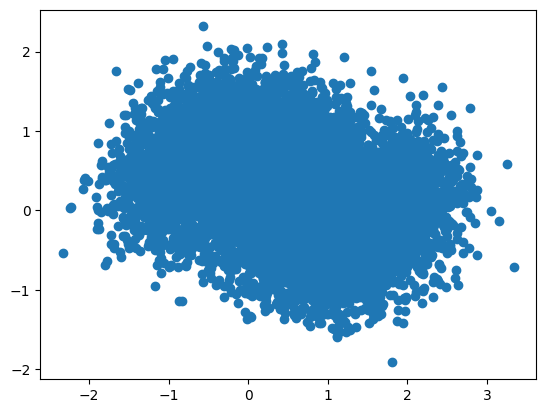

In [12]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

moons_data = make_moons(n_samples=10000, noise = 0.4)

plt.scatter(moons_data[0][:,0], moons_data[0][:,1])
plt.show()

This scatter plot doesnt give us a lot of information about the data, accept maybe we can learn something about its distribution. Let's plot the two different classes in different colors and turn down there opacity:

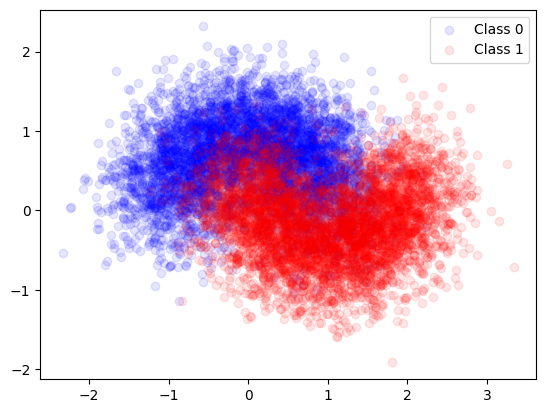

In [31]:
import numpy as np

moons_c0 = []
moons_c1 = []

for pt in range(len(moons_data[0])):
    if moons_data[1][pt] == 0:
        moons_c0.append(moons_data[0][pt])
    else:
        moons_c1.append(moons_data[0][pt])

moons_c0 = np.array(moons_c0)
moons_c1 = np.array(moons_c1)

plt.scatter(moons_c0[:, 0], moons_c0[:, 1], c="blue", alpha=0.1, label="Class 0")
plt.scatter(moons_c1[:, 0], moons_c1[:, 1], c="red", alpha=0.1, label="Class 1")
plt.legend()
plt.show()

We can see two crescent shapes composed by class 0 and 1. These crescents are colliding and there is no line that perfectly seperates the classes. We can imagine that it will likely require a Decision Tree to have many branches before it performs well. This is because the boundary that best seperates this data is a curve, which is not conducive to orthogonally drawn boundaries.

Now let's create our train and test sets, then compose a model. We will use GridSearchCV to test a number of hyperparameters:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(moons_data[0], moons_data[1], test_size=0.2)

param_grid = [
    {"criterion":["gini", "entropy"], "max_depth":[20, 50, 100, 250]},
    {"criterion":["gini", "entropy"], "max_leaf_nodes":[50, 75, 100, 250, 500]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=3,
                          scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 50, 100, 250]},
                         {'criterion': ['gini', 'entropy'],
                          'max_leaf_nodes': [50, 75, 100, 250, 500]}],
             return_train_score=True, scoring='accuracy')

We can get a list of all the classifiers and their respective accuracies as follows:

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8157498223449751 {'criterion': 'gini', 'max_depth': 20}
0.8072499470949478 {'criterion': 'gini', 'max_depth': 50}
0.8076246658214984 {'criterion': 'gini', 'max_depth': 100}
0.8061254627492644 {'criterion': 'gini', 'max_depth': 250}
0.8197502131438371 {'criterion': 'entropy', 'max_depth': 20}
0.8147503223762446 {'criterion': 'entropy', 'max_depth': 50}
0.8122506817180485 {'criterion': 'entropy', 'max_depth': 100}
0.8125006973528158 {'criterion': 'entropy', 'max_depth': 250}
0.8580010581948074 {'criterion': 'gini', 'max_leaf_nodes': 50}
0.8568758237553388 {'criterion': 'gini', 'max_leaf_nodes': 75}
0.8536252923373325 {'criterion': 'gini', 'max_leaf_nodes': 100}
0.8441248857396202 {'criterion': 'gini', 'max_leaf_nodes': 250}
0.8296251040637924 {'criterion': 'gini', 'max_leaf_nodes': 500}
0.8602512926694366 {'criterion': 'entropy', 'max_leaf_nodes': 50}
0.8592513707729519 {'criterion': 'entropy', 'max_leaf_nodes': 75}
0.85637626129442 {'criterion': 'entropy', 'max_leaf_nodes': 100}
0.843

We have already reached our goal, scoring higher than 86 percent on a three-fold cross-validation. Suprisingly, the  model which performed best was the one that used the least number of leaf nodes- *which in our case was 50*. Let's try tto improve our score a little bit by testing other values for leaf nodes, close to 50.

In [52]:
param_grid = [
    {"criterion":["gini", "entropy"], "max_leaf_nodes":[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]}
]

grid_search = GridSearchCV(tree_clf, param_grid, cv=3,
                          scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_train, y_train)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8617502144565012 {'criterion': 'gini', 'max_leaf_nodes': 10}
0.8620000894486838 {'criterion': 'gini', 'max_leaf_nodes': 15}
0.8612500894252434 {'criterion': 'gini', 'max_leaf_nodes': 20}
0.8641251989037754 {'criterion': 'gini', 'max_leaf_nodes': 25}
0.8637502457729168 {'criterion': 'gini', 'max_leaf_nodes': 30}
0.8627506989233247 {'criterion': 'gini', 'max_leaf_nodes': 35}
0.8615005269877649 {'criterion': 'gini', 'max_leaf_nodes': 40}
0.859750933233871 {'criterion': 'gini', 'max_leaf_nodes': 45}
0.8580010581948074 {'criterion': 'gini', 'max_leaf_nodes': 50}
0.857001230060046 {'criterion': 'gini', 'max_leaf_nodes': 55}
0.8565011050287881 {'criterion': 'gini', 'max_leaf_nodes': 60}
0.8562509956322977 {'criterion': 'gini', 'max_leaf_nodes': 65}
0.8562509018705745 {'criterion': 'gini', 'max_leaf_nodes': 70}
0.8626251050951715 {'criterion': 'entropy', 'max_leaf_nodes': 10}
0.8626251050951715 {'criterion': 'entropy', 'max_leaf_nodes': 15}
0.8610000269096146 {'criterion': 'entropy', 'max_le

We improve slightly, but nothing spectacular. Let's save the best model from this set and see how it performs on the test set.

In [53]:
from sklearn.metrics import accuracy_score
best_tree_clf = grid_search.best_estimator_
y_predicted = best_tree_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_predicted, y_test))

Test Accuracy: 0.8505


The test accuracy falls about 1 percent short of the training accuracy, but we met our objective!